In [1]:
import tensorflow
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [3]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


1


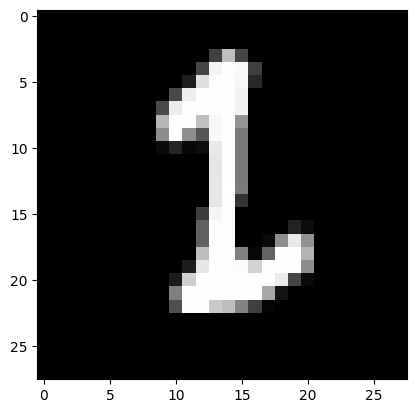

In [6]:
plt.imshow(train_X[70], cmap = 'gray')
print(train_Y[70])

In [5]:
num_classes = 10

In [7]:
train_X = train_X/255
test_X = test_X/255

In [8]:
train_X[0].shape

(28, 28)

In [9]:
train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

In [10]:
train_X[0].shape

(28, 28, 1)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [14]:
img_shape = (28, 28, 1)

In [15]:
from keras import Sequential
from keras.layers import Dense

In [18]:
model = Sequential([
    keras.Input(shape = img_shape),
    keras.layers.Conv2D(20, kernel_size = (5, 5), strides = (2, 2), padding = 'valid', activation = 'relu'),
    keras.layers.Conv2D(40, kernel_size = (5, 5), strides = (2, 2), padding = 'valid', activation = 'relu'),
    keras.layers.Conv2D(80, kernel_size = (3, 3), strides = (2, 2), padding = 'valid', activation = 'relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 20)        520       
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 40)          20040     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 80)          28880     
                                                                 
 flatten (Flatten)           (None, 80)                0         
                                                                 
 dense (Dense)               (None, 500)               40500     
                                                                 
 dense_1 (Dense)             (None, 10)                5010      
                                                                 
Total params: 94950 (370.90 KB)
Trainable params: 94950 

In [20]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
hist = model.fit(train_X, train_Y, batch_size = 100, epochs = 20, validation_split = 0.1)

Epoch 1/20
540/540 [==============================] - 11s 15ms/step - loss: 0.3592 - accuracy: 0.8917 - val_loss: 0.1116 - val_accuracy: 0.9683
Epoch 2/20
540/540 [==============================] - 7s 13ms/step - loss: 0.1170 - accuracy: 0.9640 - val_loss: 0.0956 - val_accuracy: 0.9722
Epoch 3/20
540/540 [==============================] - 7s 13ms/step - loss: 0.0826 - accuracy: 0.9748 - val_loss: 0.0716 - val_accuracy: 0.9780
Epoch 4/20
540/540 [==============================] - 7s 14ms/step - loss: 0.0652 - accuracy: 0.9795 - val_loss: 0.0657 - val_accuracy: 0.9813
Epoch 5/20
540/540 [==============================] - 7s 14ms/step - loss: 0.0554 - accuracy: 0.9820 - val_loss: 0.0649 - val_accuracy: 0.9793
Epoch 6/20
540/540 [==============================] - 8s 15ms/step - loss: 0.0448 - accuracy: 0.9853 - val_loss: 0.0689 - val_accuracy: 0.9785
Epoch 7/20
540/540 [==============================] - 7s 14ms/step - loss: 0.0402 - accuracy: 0.9866 - val_loss: 0.0533 - val_accuracy: 0.983